#Introduction

Este notebook é uma introdução aos principais conceitos e bibliotecas utilizados em processamento de linguagem natural provido pelo canal KPG Talkie no youtube.

O objetivo é me familiarizar com esses conceitos e as bibliotecas em um projeto (análise de sentimento de tweets) do início ao fim e posteriormente aplicá-los em outros problemas de processamento de linguagem natural.

[Link do vídeo](https://www.youtube.com/watch?v=VyDmQggfsZ0)

[Link do dataset disponibilizado no Kaggle](https://www.kaggle.com/kazanova/sentiment140)

No dataset temos 16 milhões de tweets pegos na API do tweeter e disponibilizado pelo link colocado acima pela ṕlataforma do Kaggle. Temos cinco (nomeadas de 0 a 5) colunas que representam:
    
    0-> sentimento do tweet (0 é negativo e 4 é positivo)
    
    1-> id do tweet
    
    2-> data do tweet
    
    3-> no query
    
    4-> nome do usuário no tweeter
    
    5-> o tweet

#Installing libraries and summary of tasks

SpaCy is an open-source software library that is published and distributed under MIT license, and is developed for performing simple to advanced Natural Language Processing (N.L.P) tasks such as tokenization, part-of-speech tagging, named entity recognition, text classification, calculating semantic similarities between text, lemmatization, and dependency parsing, among others.

In [ ]:
#!pip install -U spacy
#!pip install -U spacy-lookups-data
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_lg

In this article, we are going to perform the below tasks.


*   General Feature Extraction

*   File loading

*   Word counts

*   List item

*   Characters count

*   Average characters per word

*   Stop words count

*   Count #HashTags and @Mentions

*   If numeric digits are present in twitts

*   Upper case word counts


Preprocessing and Cleaning

*  Lower case

*  Contraction to Expansion

*  Emails removal and counts

*  URLs removal and counts

*  Removal of RT

*  Removal of Special Characters

*  Removal of multiple spaces

*  Removal of HTML tags

*  Removal of accented characters

*  Removal of Stop Words

*  Conversion into base form of words

*  Common Occuring words Removal

*  Rare Occuring words Removal


*  Word Cloud

*  Spelling Correction

*  Tokenization

*  Lemmatization

*  Detecting Entities using NER

*  Noun Detection

*  Language Detection

*  Sentence Translation

*  Using Inbuilt Sentiment Classifier


Advanced Text Processing and Feature Extraction

*  N-Gram, Bi-Gram etc

*  Bag of Words (BoW)

*  Term Frequency Calculation TF

*  Inverse Document Frequency IDF

*  TFIDF Term Frequency – Inverse Document Frequency

*  Word Embedding Word2Vec using SpaCy

*  Machine Learning Models for Text Classification

*  SGDClassifier

*  LogisticRegression

*  LogisticRegressionCV

*  LinearSVC

*  RandomForestClassifier

#Importing libraries and reading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
df = pd.read_csv('tweet16m.csv', encoding = 'latin1', header = None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#Na coluna 5 temos o tweet e na coluna zero temos a classificação do teweet como positivo ou negativo
df= df[[5, 0]]

In [ ]:
df.columns= ['tweet', 'sentiment']
df.head()

,tweet,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [ ]:
#Vamos ver o balanceamento das duas classes
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [ ]:
map_sent= {0: 'negativo', 4: 'positivo'}

####Word Counts

In [ ]:
df['word_counts']= df['tweet'].apply(lambda x: len(str(x).split()))
df.head()

,tweet,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


####Character Counts

In [ ]:
df['char_counts']= df['tweet'].apply(lambda x: len(x))
df.head()

,tweet,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


####Average Word Lenght

In [ ]:
def get_avg_word_len(x):
    words= x.split()
    word_len= 0 
    for word in words:
        word_len= word_len + len(word)
    return word_len / len(words)  # != len(x) / len(words)

In [ ]:
df['avg_word_len']= df['tweet'].apply(lambda x: get_avg_word_len(x))
df.head()

,tweet,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


####Stop Words Count

Obs: ser calculoso com a remoção direta das stop words. Analisar quais são e se o problema não permite q algumas delas sejam removidas dos documentos para não perder informação importante

In [ ]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [ ]:
#Contagem de stop words
df['stop_words_counts']= df['tweet'].apply(lambda x: len([word for word in x.split() if word in STOP_WORDS]))
df.head()

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


####Count #HashTags and @Mentions

In [ ]:
df['hashtags_count']= df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df['mentions_count']= df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))

df.head()

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


####If numeric digits are present in twitts

In [ ]:
df['numerics_count']= df['tweet'].apply(lambda x: len([n for n in x.split() if n.isdigit()]))
df.head()

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


####Upper case word counts

In [ ]:
#Contagem importante para este problema porque é usual quando alguém está com raiva/triste 
#tweetar em letras maiúsculas
df['upper_counts']= df['tweet'].apply(lambda x: len([u for u in x.split() if u.isupper() and len(x)>3]))
df.head()

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [ ]:
#Verificando tweet como exemplo do significado das letras maiúsculas mencionado
df.iloc[96]['tweet']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

#Preprocessing and Cleaning

####Lower case conversion

In [ ]:
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df.head(2)

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0


####Contraction to Expansion

In [ ]:
#Dicionário para retornar contrações para a forma de escrita formal
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
x= "hi, i'd be happy"

cont_to_exp(x)

'hi, i would be happy'

In [ ]:
%%time
df['tweet']= df['tweet'].apply(lambda x: cont_to_exp(x))

CPU times: user 32.3 s, sys: 68.6 ms, total: 32.4 s
Wall time: 32.5 s


In [ ]:
df.head()

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1


####Emails removal and counts

In [ ]:
import re

In [ ]:
x= 'hi, my email me at email@email.com another@email.com'

re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x)

['email@email.com', 'another@email.com']

In [ ]:
df['email']= df['tweet'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))
df.head()

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts,email
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[]
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[]
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[]
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[]
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[]


In [ ]:
df['emails_count']= df['email'].apply(lambda x: len(x))
df.head()

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts,email,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0


In [ ]:
#Total de tweets com ao menos um e_mail contido neles
len(df[df['emails_count']>0])

564

In [ ]:
x= 'hi, my email me at email@email.com another@email.com'

x= re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x)

print(x)

hi, my email me at  


In [ ]:
#Removendo e-mails
df['tweet']= df['tweet'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))

In [ ]:
df[df['emails_count']>0].head()

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts,email,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


####Count URLs and Remove it

In [ ]:
x= 'hi, watch the video on https://youtube.com/kgptalkie'

re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'youtube.com', '/kgptalkie')]

In [ ]:
df['urls_flag']= df['tweet'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [ ]:
#Removendo links
df['tweet']= df['tweet'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))

In [ ]:
df.head()

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts,email,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,0


####Remove RT (retweet)

In [ ]:
df['tweet']= df['tweet'].apply(lambda x: re.sub('RT', '', x))

####Removing special characters and punctuation

In [ ]:
df['tweet']= df['tweet'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [ ]:
df.head()

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts,email,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoul...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,0


####Removing multiple spaces

In [ ]:
x= "Hi,                            what's going on?"

' '.join(x.split())

"Hi, what's going on?"

In [ ]:
df['tweet']= df['tweet'].apply(lambda x: ' '.join(x.split()))

In [ ]:
df.sample(2)

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts,email,emails_count,urls_flag
1231304,djflight is there a download link for that,4,8,45,4.625,4,0,1,0,0,[],0,0
1069879,i am backpaul blart was pretty funny,4,6,39,5.500,1,0,0,0,0,[],0,0


####Remove HTML tags

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
x = '<html><h2>Thanks for watching</h2></html>'

In [ ]:
BeautifulSoup(x, 'lxml').get_text()

'Thanks for watching'

In [ ]:
%%time
df['tweet']= df['tweet'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

CPU times: user 4min 32s, sys: 20.4 s, total: 4min 53s
Wall time: 4min 53s


####Remove accented Chars

In [ ]:
import unicodedata
x= 'Têxto com acêntó'

In [ ]:
def remove_accented_chars(x):
    x= unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [ ]:
remove_accented_chars(x)

'Texto com acento'

#Spacy and NLP

####Remove Stop Words

In [ ]:
import spacy

In [ ]:
x= 'this is stop word removal code is a and how what'

' '.join(t for t in x.split() if t not in STOP_WORDS)

'stop word removal code'

In [ ]:
df['tweet']= df['tweet'].apply(lambda x: ' '.join([t for t in x.split() if t not in STOP_WORDS]))

In [ ]:
df.head()

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts,email,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


####Convert into base or root form of word

In [ ]:
nlp= spacy.load('en_core_web_sm')

In [ ]:
x= 'kenichan dived times ball managed save 50 rest'

In [ ]:
def make_to_base(x):
    x_list= []
    doc= nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(' '.join(x_list))

In [ ]:
make_to_base(x)

kenichan dive time ball manage save 50 rest


Obs: não vamos utilizar essa função ao dataset, pois levaria muito tempo para finalizar devido a estar utilizando a máquina local nestes exercícios.

####Common words removal

In [ ]:
' '.join(df.head()['tweet'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [ ]:
#Juntando todos os tweets em uma única string
text= ' '.join(df['tweet'])

In [ ]:
#Separando cada palavra dos tweets em um única lista
text= text.split()

#Transformando a lista gerada em uma Serie Pandas e contando a ocorrência das palavras
freq_comm= pd.Series(text).value_counts()

In [ ]:
print(freq_comm.head())

print()

print(freq_comm.tail())

good     89366
day      82299
like     77735
-        69662
today    64512
dtype: int64

thaatrademark    1
cnn-us           1
thehott          1
rainenjoy        1
deliciomatic     1
dtype: int64


In [ ]:
f20= freq_comm[:20]
f20

good      89366
day       82299
like      77735
-         69662
today     64512
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
know      51172
im        50147
want      42070
new       41995
think     41040
night     41029
amp       40616
thanks    39311
home      39168
dtype: int64

In [ ]:
#df['tweet']= df['tweet'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

####Rare Words removal

In [ ]:
rare= freq_comm[freq_comm.values == 1]

In [ ]:
print(f'Total de palavras que só ocorrem uma vez nos 16 milhões tweets: {len(rare)}')

Total de palavras que só ocorrem uma vez nos 16 milhões tweets: 536196


In [ ]:
#rare20= freq_comm[-20:]
#rare20

In [ ]:
%%time
df['tweet']= df['tweet'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare]))

CPU times: user 13.8 s, sys: 56.2 ms, total: 13.8 s
Wall time: 13.8 s


####Word Cloud Visualization

In [ ]:
from wordcloud import WordCloud

In [ ]:
x= ' '.join(text[:20000])

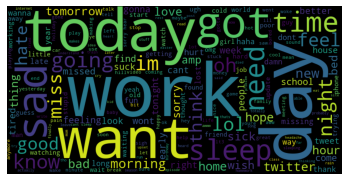

In [ ]:
wc= WordCloud(width= 800, height= 400).generate(x)
plt.imshow(wc)
plt.axis('off');

####Spelling Correction

In [ ]:
from textblob import TextBlob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
x= 'tanks forr waching this vidio carri'
x= TextBlob(x).correct()
x

TextBlob("tanks for watching this video carry")

####Tokenization

In [ ]:
x= 'thanks for#watching this video. please like it'
TextBlob(x).words

WordList(['thanks', 'for', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [ ]:
doc= nlp(x)

for token in doc:
  print(token)

thanks
for#watching
this
video
.
please
like
it


####Lemmatization

In [ ]:
from textblob import Word

In [ ]:
x= 'runs run running ran'
for token in x.split():
  print(Word(token).lemmatize())

run
run
running
ran


In [ ]:
#Better result than above
doc= nlp(x)

for token in doc:
  print(token.lemma_)

run
run
run
run


####Detect Entities using NER of Spacy

In [ ]:
x= 'Breaking news: Donald Trump, the president of USA is looking to sign a deal to mine the moon'

doc= nlp(x)

for ent in doc.ents:
  print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [ ]:
from spacy import displacy

In [ ]:
#displacy.render(doc, style= 'ent')

####Detecting Nouns

In [ ]:
print(f'Frase: {x}')
print()
print('Nouns:')
for noun in doc.noun_chunks:
  print(noun)

Frase: Breaking news: Donald Trump, the president of USA is looking to sign a deal to mine the moon

Nouns:
Breaking news
Donald Trump
the president
USA
a deal
the moon


####Translation and Language Detection

Language Code: www.loc.gov/standards/iso639-2/php/code_list.php

In [ ]:
x= 'Eu sou brasileiro'
tb= TextBlob(x)
translation= tb.translate(to= 'en')

print(f'Language: {tb.detect_language()}')
print(f'Translation: {translation}')

Language: pt
Translation: I am Brazilian


####Use inbuilt sentiment classifier

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
x= 'we all stands together to fight with corona virus. We will win together'

tb= TextBlob(x, analyzer= NaiveBayesAnalyzer())

tb.sentiment

Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480578962)

In [ ]:
x= 'we all are sufering from corona'

tb= TextBlob(x, analyzer= NaiveBayesAnalyzer())

tb.sentiment

Sentiment(classification='pos', p_pos=0.75616044472398, p_neg=0.2438395552760203)

#Advanced Text Processing

####N-Grams

Agrupa as palavras dos documentos por grupos (listas), de uma em uma, duas em duas etc. Isso pode ser importante pra quando a interrelação entre duas ou mais palavras são importantes de acordo com o problema que estamos analisando.

In [ ]:
x= 'thanks for watching'
tb= TextBlob(x)
tb.ngrams(2)

[WordList(['thanks', 'for']), WordList(['for', 'watching'])]

####Bag of words BOW

Dicionário com a contagem da ocorrência/frequência de cada palavra dentro do documento

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
x= ['this is the first sentence', 'this is the seconde one', 'this is the last']

cv= CountVectorizer(ngram_range=(1, 1))

text_counts= cv.fit_transform(x)

text_counts.toarray()

array([[1, 1, 0, 0, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 0, 1, 1],
       [0, 1, 1, 0, 0, 0, 1, 1]])

In [ ]:
#Tranformando o array acima em um dataframe
bow= pd.DataFrame(text_counts.toarray(), columns= cv.get_feature_names())
bow

,first,is,last,one,seconde,sentence,the,this
0,1,1,0,0,0,1,1,1
1,0,1,0,1,1,0,1,1
2,0,1,1,0,0,0,1,1


#### Term Frequency

Term frequency is simply the ratio of the count of a word present in a sentence, to the lenght of the sentence.

In [ ]:
bow.shape

(3, 8)

In [ ]:
tf= bow.copy()

In [ ]:
for index, row in enumerate(tf.iterrows()):
  for col in row[1].index:
    tf.loc[index, col]= tf.loc[index, col] / sum(row[1].values)

tf

,first,is,last,one,seconde,sentence,the,this
0,0.2,0.20,0.00,0.0,0.0,0.2,0.20,0.20
1,0.0,0.20,0.00,0.2,0.2,0.0,0.20,0.20
2,0.0,0.25,0.25,0.0,0.0,0.0,0.25,0.25


####Inverse Document Frequency (IDF)

                                            idf = log( (1 + N) / (n + 1) ) + 1 


Where N is the total number of rows (documents in this case)  and n is the number of rows in wich the word was present.


*used in sklearn when smooth_idf = True

In [ ]:
x_df= pd.DataFrame(x, columns= ['document'])
x_df

,document
0,this is the first sentence
1,this is the seconde one
2,this is the last


In [ ]:
#Total number of documents
N= bow.shape[0]

In [ ]:
#To know if a specific word appear or not on the document
bb= bow.astype('bool')
bb

,first,is,last,one,seconde,sentence,the,this
0,True,True,False,False,False,True,True,True
1,False,True,False,True,True,False,True,True
2,False,True,True,False,False,False,True,True


In [ ]:
bb['is'].sum()

3

In [ ]:
#Colunas/palavras no bow
cols= bb.columns

#Contagem de aparições (sim ou não) de cada palavra em todos os documentos
nz= []

for col in cols:
  nz.append(bb[col].sum())

nz

[1, 3, 1, 1, 1, 1, 3, 3]

In [ ]:
#Inverse term frequency
idf= []

for index, col in enumerate(cols):
  idf.append(np.log((N + 1) / (nz[index])) + 1)

idf

[2.386294361119891,
 1.2876820724517808,
 2.386294361119891,
 2.386294361119891,
 2.386294361119891,
 2.386294361119891,
 1.2876820724517808,
 1.2876820724517808]

In [ ]:
bow

,first,is,last,one,seconde,sentence,the,this
0,1,1,0,0,0,1,1,1
1,0,1,0,1,1,0,1,1
2,0,1,1,0,0,0,1,1


In [ ]:
idf_dataframe= pd.DataFrame(idf, bb.columns).reset_index()
idf_dataframe.columns= ['word', 'idf']

In [ ]:
idf_dataframe

,word,idf
0,first,2.386294
1,is,1.287682
2,last,2.386294
3,one,2.386294
4,seconde,2.386294
5,sentence,2.386294
6,the,1.287682
7,this,1.287682


####TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf= TfidfVectorizer()
x_tfidf= tfidf.fit_transform(x_df['document'])
x_tfidf.toarray()

array([[0.57292883, 0.338381  , 0.        , 0.        , 0.        ,
        0.57292883, 0.338381  , 0.338381  ],
       [0.        , 0.338381  , 0.        , 0.57292883, 0.57292883,
        0.        , 0.338381  , 0.338381  ],
       [0.        , 0.41285857, 0.69903033, 0.        , 0.        ,
        0.        , 0.41285857, 0.41285857]])

In [ ]:
#idf from Skalearn
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.69314718, 1.        , 1.        ])

####Word Embeddings

Spacy 'Word2Vec'

In [ ]:
#!python -m spacy download en_core_web_lg

In [ ]:
nlp= spacy.load('en_core_web_lg')
doc= nlp('thank you! dog cat lion dfsaa')

In [ ]:
for token in doc:
  print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
dfsaa False


In [ ]:
token.vector.shape

(300,)

In [ ]:
nlp('cat').vector.shape

(300,)

In [ ]:
for token1 in doc:
  for token2 in doc:
    print(token1.text, token2.text, token1.similarity(token2))

thank thank 1.0
thank you 0.56475854
thank ! 0.52147406
thank dog 0.25042647
thank cat 0.20648488
thank lion 0.13629763
thank dfsaa 0.0
you thank 0.56475854
you you 1.0
you ! 0.4390223
you dog 0.364941
you cat 0.3080798
you lion 0.20392053
you dfsaa 0.0
! thank 0.52147406
! you 0.4390223
! ! 1.0
! dog 0.29852206
! cat 0.29702345
! lion 0.19601384
! dfsaa 0.0
dog thank 0.25042647
dog you 0.364941
dog ! 0.29852206
dog dog 1.0
dog cat 0.80168545
dog lion 0.47424486
dog dfsaa 0.0
cat thank 0.20648488
cat you 0.3080798
cat ! 0.29702345
cat dog 0.80168545
cat cat 1.0
cat lion 0.5265438
cat dfsaa 0.0
lion thank 0.13629763
lion you 0.20392053
lion ! 0.19601384
lion dog 0.47424486
lion cat 0.5265438
lion lion 1.0
lion dfsaa 0.0
dfsaa thank 0.0
dfsaa you 0.0
dfsaa ! 0.0
dfsaa dog 0.0
dfsaa cat 0.0
dfsaa lion 0.0
dfsaa dfsaa 1.0


/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty v

#### Machine Learning Models for text Classification

####BOW

In [111]:
df.shape

(1600000, 13)

In [112]:
#AMostras de 2000 tweets positivos e negativos cada
df0= df[df['sentiment']==0].sample(2000)
df4= df[df['sentiment']==4].sample(2000)

In [115]:
#Novo dataframe com amostra no tamanho total de 4000 tweets
dfr= df0.append(df4)
dfr.shape

(4000, 13)

In [139]:
#Features que serão utilizadas como variáveis respostas -> retirando aquelas q não serão utilizadas
dfr_feat= dfr.drop(labels= ['tweet', 'sentiment', 'email'], axis= 1).reset_index(drop= True)

#Variável que queremos prever -> sentimento do tweet
y= dfr['sentiment']

In [140]:
cv= CountVectorizer()
text_counts= cv.fit_transform(dfr['tweet'])

In [141]:
text_counts.toarray().shape

(4000, 8516)

In [143]:
dfr_bow= pd.DataFrame(text_counts.toarray(), columns= cv.get_feature_names())
dfr_bow

,02,0430,07,09,0rch1d,10,100,1000th,1005pm,1009,100mbit,1012,102,107,10k,10min,10th,11,111,1115,1130,115,11pm,11th,12,1200,12000,1230,124,1247,1260,13,1300,1300hrs,130am,13th,14,140,140conf,140tc,...,younger,youngmickey,youngq,youngstown,youquot,youre,yourr,youth,youtube,youu,youuuuu,youve,yr,yt,yuck,yuk,yum,yumminess,yummy,yup,za,zac,zach,zack,zacky,zaidah1,zap,ze,zekes,zepplin,zhongnanhai,zimbabwe,ziti,zoe,zoecello,zombies,zoo,zucchini,zzzz,zzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#ML Algotithms

In [144]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import  LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [145]:
sgd= SGDClassifier(n_jobs=1, random_state= 42, max_iter=200)
lgr= LogisticRegression(random_state=42, max_iter=200)
lgrcv= LogisticRegressionCV(cv= 5, random_state=42, max_iter=1000)
svm= LinearSVC(random_state=42, max_iter=200)
rfc= RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [146]:
clf= {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC': rfc}
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [147]:
def classify(X, y):
  scaler= MinMaxScaler(feature_range= (0, 1))
  X= scaler.fit_transform(X)
  
  X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

  for key in clf.keys():
    clf[key].fit(X_train, y_train)
    y_pred= clf[key].predict(X_test)
    ac= accuracy_score(y_test, y_pred)
    print(key, '----->', ac)

####BOW

In [148]:
%%time
classify(dfr_bow, y)

SGD -----> 0.67375
LGR -----> 0.705


KeyboardInterrupt: ignored

####Manual Feature

In [136]:
dfr_feat.head(2)

,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag
501347,21,138,5.571429,10,0,0,0,0,0,0
685047,10,46,3.600000,3,0,1,0,0,0,0


In [137]:
%%time
classify(dfr_feat, y)

SGD -----> 0.60375
LGR -----> 0.60625
LGR-CV -----> 0.595
SVM -----> 0.6
RFC -----> 0.54125
CPU times: user 2.54 s, sys: 868 ms, total: 3.41 s
Wall time: 1.98 s


Estamos utilizando amostras, ou seja, um número menor de dados. Com o aumento da amostra ou na utilização de todos os dados, a acurácia dos modelos seriam maiores.

####Manual features + BOW

In [151]:
X=  dfr_feat.join(dfr_bow)
X.head(2)

,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag,02,0430,07,09,0rch1d,10,100,1000th,1005pm,1009,100mbit,1012,102,107,10k,10min,10th,11,111,1115,1130,115,11pm,11th,12,1200,12000,1230,124,1247,...,younger,youngmickey,youngq,youngstown,youquot,youre,yourr,youth,youtube,youu,youuuuu,youve,yr,yt,yuck,yuk,yum,yumminess,yummy,yup,za,zac,zach,zack,zacky,zaidah1,zap,ze,zekes,zepplin,zhongnanhai,zimbabwe,ziti,zoe,zoecello,zombies,zoo,zucchini,zzzz,zzzzzzzzzzzz
0,21,138,5.571429,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,46,3.600000,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [152]:
%%time
classify(X, y)

SGD -----> 0.6825
LGR -----> 0.6975
LGR-CV -----> 0.69625
SVM -----> 0.67625
RFC -----> 0.68375
CPU times: user 4min 23s, sys: 12.3 s, total: 4min 35s
Wall time: 2min 23s


Vemos que a acurácia também melhora ao utilizarmos o BOW junto com as features de contagem de palavras, caracteres, letras maiúsculas etc.

####TFIDF

In [156]:
dfr.head(2)

,tweet,sentiment,word_counts,char_counts,avg_word_len,stop_words_counts,hashtags_count,mentions_count,numerics_count,upper_counts,email,emails_count,urls_flag
501347,looking freshman sophomore yearbooks people me...,0,21,138,5.571429,10,0,0,0,0,[],0,0
685047,thejose told ya - hooked thing,0,10,46,3.600000,3,0,1,0,0,[],0,0


In [160]:
tfidf= TfidfVectorizer()
X= tfidf.fit_transform(dfr['tweet'])

#Passando X para dataframe, pois MinMaxScaler não aceita objetos do tipo scipy.sparse.csr.csr_matrix
X= pd.DataFrame(X.toarray())

In [162]:
%%time
classify(X, y)

SGD -----> 0.66875
LGR -----> 0.69625
LGR-CV -----> 0.69875
SVM -----> 0.67625
RFC -----> 0.66625
CPU times: user 3min 44s, sys: 6.99 s, total: 3min 51s
Wall time: 1min 59s


####Word2Vec

In [163]:
def get_vec(x):
  doc= nlp(x)
  return doc.vector.reshape(1, -1)

In [164]:
%%time
dfr['vec']= dfr['tweet'].apply(lambda x: get_vec(x))

CPU times: user 35.3 s, sys: 30.7 ms, total: 35.4 s
Wall time: 35.4 s


In [166]:
X= np.concatenate(dfr['vec'].to_numpy(), axis= 0)
X= pd.DataFrame(X)
X.shape

(4000, 300)

In [167]:
%%time
classify(X, y)

SGD -----> 0.71


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LGR -----> 0.715
LGR-CV -----> 0.71875


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM -----> 0.70125
RFC -----> 0.7025
CPU times: user 28.6 s, sys: 5.96 s, total: 34.6 s
Wall time: 18.1 s


In [168]:
def predict_w2v(x):
  for key in clf.keys():
    y_pred= clf[key].predict(get_vec(x))
    print(key, '------->', y_pred)

In [169]:
predict_w2v('Hi, thanks for watching this video. please like!')

SGD -------> [4]
LGR -------> [4]
LGR-CV -------> [4]
SVM -------> [4]
RFC -------> [0]


In [170]:
predict_w2v('Please, let me know if you want more videos')

SGD -------> [0]
LGR -------> [0]
LGR-CV -------> [0]
SVM -------> [0]
RFC -------> [0]


In [172]:
predict_w2v('congratulations! I"m proud of you!')

SGD -------> [4]
LGR -------> [4]
LGR-CV -------> [4]
SVM -------> [4]
RFC -------> [0]
